# CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
import stella
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%load_ext tensorboard

/Users/azib/micromamba/envs/nets2/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/azib/.lightkurve/cache. Please move all the files in the legacy directory /Users/azib/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
exoplanets = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/exoplanets1k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/exoplanets1k.txt',cadences=168,training=0.8,validation=0.1,frac_balance=0.5)

Reading in training set files.


100%|████████████████████████████| 999/999 [00:00<00:00, 1101.66it/s]


Number of positive class training data: 799
Number of negative class training data: 1232
Number of positive class validation data: 100
Number of negative class validation data: 154
Size of augmented data (training set only): 0
Class label (training): 0, Count: 1232
Class label (training): 1, Count: 799
Class label (validation): 0, Count: 154
Class label (validation): 1, Count: 100
Total size of training set: 2031
Total size of validation set: 254
Total size of test set: 254
Approximate class imbalance: 35.0


In [3]:
fbinaries = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/binaries1k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/fakebinaries1k.txt',cadences=168,training=0.8,validation=0.1,frac_balance=0.65)

Reading in training set files.


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2849.15it/s]

1000 positive classes
1060 negative classes
94.0% class imbalance



In [4]:
# exocomets = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/comets5k/',
#                          catalog='/Users/azib/Documents/open_source/nets2/catalogs/comets.txt',cadences=168,training=0.8,validation=0.1,frac_balance=0.55)

In [5]:
rbinaries = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/binaries-s7/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/binaries-catalog-s7.txt',cadences=168,training=0.8,validation=0.1,frac_balance=1)

Reading in training set files.


100%|██████████████████████████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 1232.20it/s]

2600 positive classes
0 negative classes
Division by zero error. Cannot calculate class imbalance.


In [6]:
ds = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/comets5k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/comets.txt',cadences=168,training=0.8,validation=0.1,merge_datasets=True,frac_balance=0.7, other_datasets = [exoplanets,fbinaries,rbinaries],other_datasets_labels = [2,3,4])

Reading in training set files.


100%|████████████████████████████████████████████████████████████████████████████| 5084/5084 [00:01<00:00, 3189.97it/s]


5013 positive classes
4741 negative classes
106.0% class imbalance



## Training Data Plots

4010 positive class in training set
9552 true negative class in training set


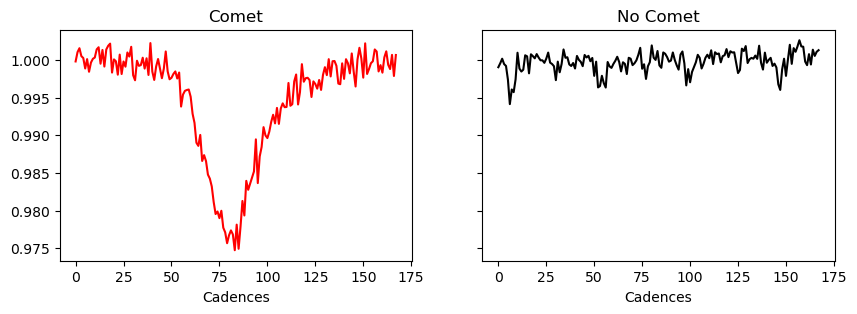

In [7]:
ind_pc = np.where(ds.train_labels==1)[0] 
ind_nc = np.where(ds.train_labels!=1)[0] 
print(len(ind_pc),"positive class in training set")
print(len(ind_nc),"true negative class in training set")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3),
                               sharex=True, sharey=True)
ax1.plot(ds.train_data[ind_pc[0]], 'r')
ax1.set_title('Comet')
ax1.set_xlabel('Cadences')
ax2.plot(ds.train_data[ind_nc[0]], 'k')
ax2.set_title('No Comet')
ax2.set_xlabel('Cadences');

In [8]:
np.unique(ds.train_labels)

array([0, 1])

## Training Data Imbalance

In [9]:
print(f"{np.round(100 * len(ind_pc) / len(ind_nc))}% class imbalance")
print(len(ind_pc), "positive class")
print(len(ind_nc), "negative class")

42.0% class imbalance
4010 positive class
9552 negative class


In [10]:
len(ind_pc)

4010

## Validation data plots

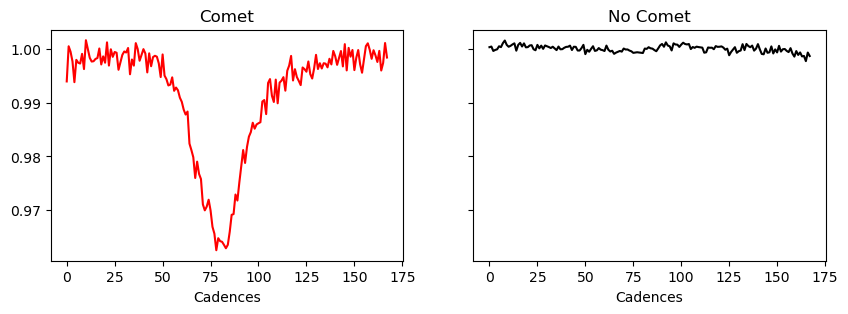

In [11]:
val_pc = np.where(ds.val_labels==1)[0] 
val_nc = np.where(ds.val_labels!=1)[0] 


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3),
                               sharex=True, sharey=True)
ax1.plot(ds.val_data[val_pc[2]], 'r')
ax1.set_title('Comet')
ax1.set_xlabel('Cadences')
ax2.plot(ds.val_data[val_nc[4]], 'k')
ax2.set_title('No Comet')
ax2.set_xlabel('Cadences');

In [12]:
print(f"{np.round(100 * len(val_pc) / len(val_nc))}% class imbalance")
print(len(val_pc), "positive class")
print(len(val_nc), "negative class")

42.0% class imbalance
501 positive class
1194 negative class


In [13]:
len(val_pc)

501

In [14]:
# dsmodels = ds.train_data[ind_pc]

# num_sets = dsmodels.shape[0] // 100

# for set_index in range(num_sets):
#     start_index = set_index * 100
#     end_index = min((set_index + 1) * 100, dsmodels.shape[0])  # Ensure not to exceed the length of the data

#     # Create a new 10x10 grid of subplots for each set
#     fig, axs = plt.subplots(10, 10, figsize=(20, 20))

#     # Flatten the axes array for easier iteration
#     axs = axs.flatten()

#     # Iterate over the elements in the current set and plot each in the grid
#     for i in range(start_index, end_index):
#         plot_index = i % 100  # Calculate the index within the current grid
#         axs[plot_index].plot(dsmodels[i, :, 0])  # Assuming you want to plot the first dimension of your array
#         axs[plot_index].set_title(f"Plot {i}")  # Title for each subplot

#     # Hide any remaining empty subplots
#     for j in range(end_index - start_index, len(axs)):
#         axs[j].axis('off')

    
#     plt.tight_layout()  # Adjust layout
#     plt.savefig(f'example-models{start_index}-{end_index}.png',dpi=200,bbox_inches='tight')
#     plt.show()  # Show the grid of plots
#     break

In [15]:
filter1 = 16
filter2 = 64

layers = [
    keras.layers.Conv1D(filters=filter1, kernel_size=7, activation='relu', padding='same', input_shape=(168, 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.1),
    keras.layers.Conv1D(filters=filter2, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
]

In [16]:
cnn = stella.ConvNN(output_dir='/Users/azib/Documents/open_source/nets2/cnn-models/',ds=ds)#,layers=layers)
SEED = [2]

In [17]:
cnn.train_models(seeds=SEED, epochs=200,batch_size=80,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 168, 16)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 84, 16)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 84, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 64)            3136      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 42, 64)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 42, 64)            0

/Users/azib/micromamba/envs/nets2/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - 0s 1ms/step


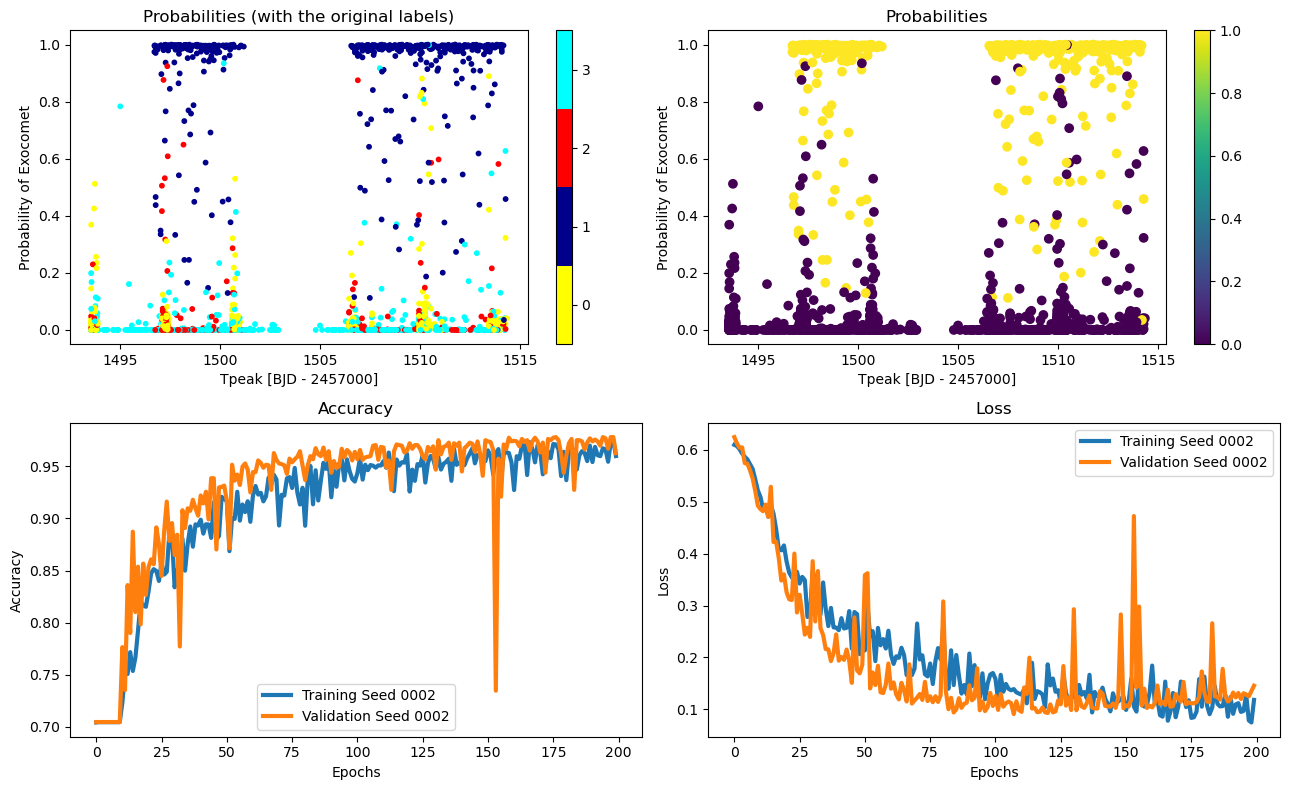

In [34]:
from matplotlib import cm
import matplotlib.colors as mcolors
import numpy as np

if type(SEED) == list:
    for seeds in SEED:
        # Create a custom colormap
        custom_cmap = mcolors.ListedColormap(['yellow', 'darkblue', 'red','cyan'])

        fig, axes = plt.subplots(2, 2, figsize=(13,8))
        formatted_seed = f'{seeds:04}'

        # Plot ground truth
        sc = axes[0, 0].scatter(cnn.val_pred_table['tpeak'], cnn.val_pred_table[f'pred_s{formatted_seed}'],
                                c=cnn.val_pred_table['labels'], cmap=custom_cmap, label=f'Seed {formatted_seed}',s=10)
        axes[0, 0].set_xlabel('Tpeak [BJD - 2457000]')
        axes[0, 0].set_ylabel('Probability of Exocomet')
        axes[0,0].set_title('Probabilities (with the original labels)')
        plt.colorbar(sc, ax=axes[0, 0], ticks=np.arange(4), boundaries=np.arange(4+1)-0.5)

        # Plot loss
        axes[1, 1].plot(cnn.history_table[f'loss_s{formatted_seed}'], label=f'Training Seed {formatted_seed}', lw=3)
        axes[1, 1].plot(cnn.history_table[f'val_loss_s{formatted_seed}'], label=f'Validation Seed {formatted_seed}', lw=3)
        axes[1, 1].set_xlabel('Epochs')
        axes[1, 1].set_ylabel('Loss')
        axes[1,1].set_title('Loss')
        axes[1, 1].legend()

        # Plot accuracy
        axes[1, 0].plot(cnn.history_table[f'accuracy_s{formatted_seed}'], label=f'Training Seed {formatted_seed}', lw=3)
        axes[1, 0].plot(cnn.history_table[f'val_accuracy_s{formatted_seed}'], label=f'Validation Seed {formatted_seed}', lw=3)
        axes[1, 0].set_xlabel('Epochs')
        axes[1, 0].set_ylabel('Accuracy')
        axes[1, 0].set_title('Accuracy')
        axes[1, 0].legend()

        # Plot ground truth (gt)
        sc2 = axes[0, 1].scatter(cnn.val_pred_table['tpeak'], cnn.val_pred_table[f'pred_s{formatted_seed}'],
                                 c=cnn.val_pred_table['gt'], label=f'Seed {formatted_seed}')
        axes[0, 1].set_xlabel('Tpeak [BJD - 2457000]')
        axes[0, 1].set_ylabel('Probability of Exocomet')
        axes[0,1].set_title('Probabilities')
        plt.colorbar(sc2, ax=axes[0, 1])#, ticks=np.arange(2)#, boundaries=np.arange(2)-0.5)
    
        plt.tight_layout()
        plt.savefig('plots.png',dpi=300,bbox_inches='tight')
        plt.show()

# Load CNN

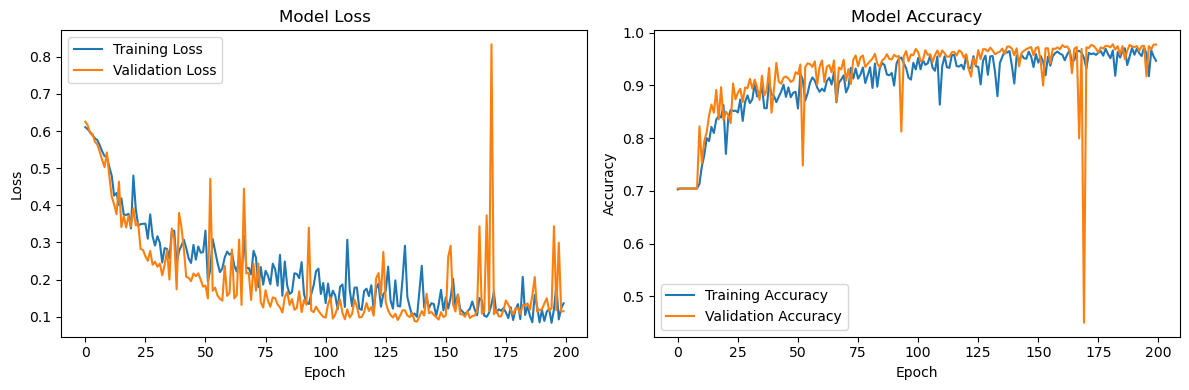

In [19]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(cnn.history)

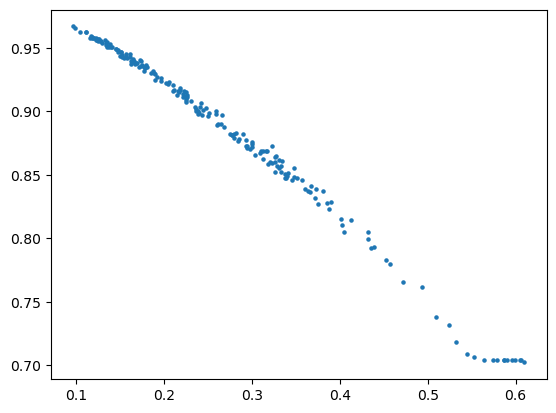

In [26]:
plt.scatter(cnn.history.history['loss'],cnn.history.history['accuracy'],s=5)

In [20]:
cnn.history_table

loss_s0002,accuracy_s0002,precision_s0002,recall_s0002,val_loss_s0002,val_accuracy_s0002,val_precision_s0002,val_recall_s0002
float64,float64,float64,float64,float64,float64,float64,float64
0.6103324294090271,0.7026249766349792,0.3580246865749359,0.007231920026242733,0.6250782608985901,0.7044247984886169,0.0,0.0
0.6048092842102051,0.7043209075927734,0.0,0.0,0.6153789758682251,0.7044247984886169,0.0,0.0
0.5976858735084534,0.7043209075927734,0.0,0.0,0.5942268967628479,0.7044247984886169,0.0,0.0
0.5884935259819031,0.7043209075927734,0.0,0.0,0.592570960521698,0.7044247984886169,0.0,0.0
...,...,...,...,...,...,...,...
0.11994663625955582,0.9602565765380859,0.9352896809577942,0.9299252033233643,0.3437456488609314,0.9174041152000427,0.7897271513938904,0.9820359349250793
0.18465620279312134,0.917563796043396,0.8210479617118835,0.9221945405006409,0.11746697127819061,0.9746312499046326,0.947265625,0.9680638909339905
0.09268271178007126,0.9667453169822693,0.9443196058273315,0.9431421160697937,0.29937872290611267,0.9687315821647644,0.9258555173873901,0.9720559120178223
0.12242833524942398,0.9547264575958252,0.9253507256507874,0.9211969971656799,0.11441024392843246,0.9775811433792114,0.9512670636177063,0.9740518927574158


53/53 [==============================] - 0s 1ms/step


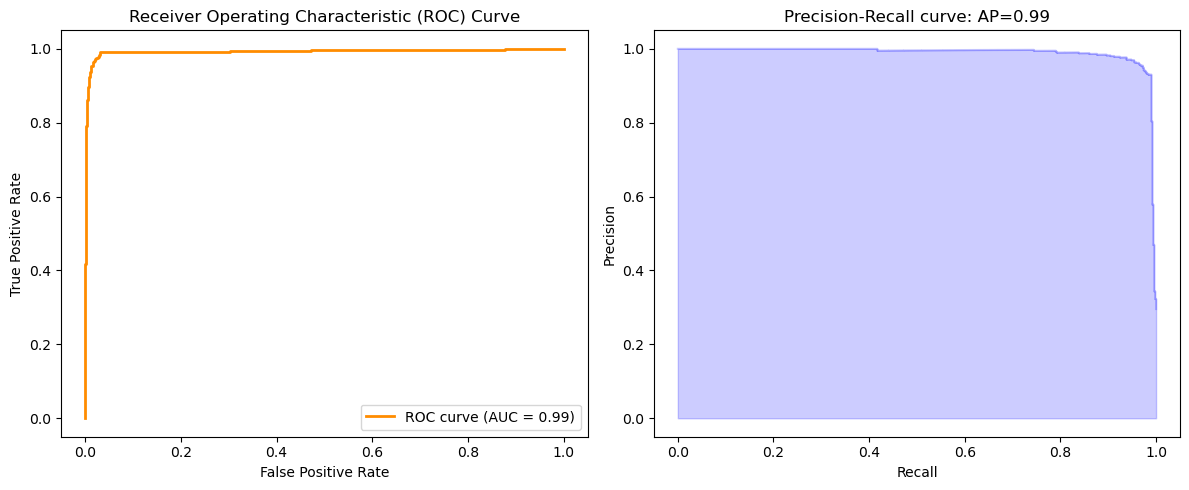

In [21]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr_curves(y_true, y_pred):
    # Calculate metrics for ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # Calculate metrics for Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    avg_precision = average_precision_score(y_true, y_pred)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot ROC curve
    ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    #ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #ax1.set_xlim([0.0, 1.0])
    #ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc="lower right")

    # Plot Precision-Recall curve
    ax2.step(recall, precision, color='b', alpha=0.2, where='post')
    ax2.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    #ax2.set_ylim([0.0, 1.05])
    #ax2.set_xlim([0.0, 1.0])
    ax2.set_title(f'Precision-Recall curve: AP={avg_precision:.2f}')

    plt.tight_layout()
    plt.show()

# After getting predictions on validation data:
y_pred = cnn.model.predict(cnn.ds.val_data).ravel()
plot_roc_pr_curves(cnn.ds.val_labels, y_pred)

In [20]:
cnn.history

In [22]:
cnn.predict(modelname='/Users/azib/Documents/open_source/nets2/cnn-models/ensemble_s0002_i0200_b0.7.h5',
            times=lc.time.value,
            fluxes=lc.flux.value,
            errs=lc.flux_err)

NameError: name 'lc' is not defined

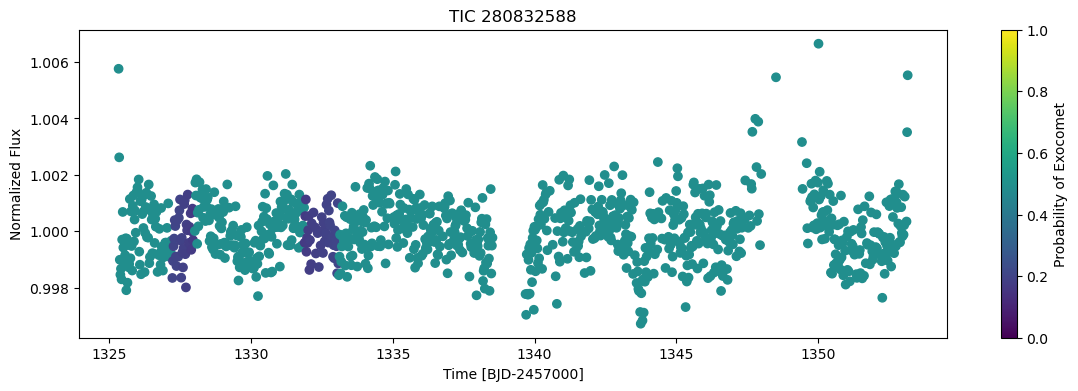

In [109]:
plt.figure(figsize=(14,4))
plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=cnn.predictions[0], vmin=0, vmax=1)
plt.colorbar(label='Probability of Exocomet')
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Normalized Flux')
plt.title('TIC {}'.format(lc.targetid));